In [1]:
#Import Libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Cars (2) (1) (2) (1) (1).csv", index_col=False) #,index_col=0

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [6]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

Outlier Check & Removal

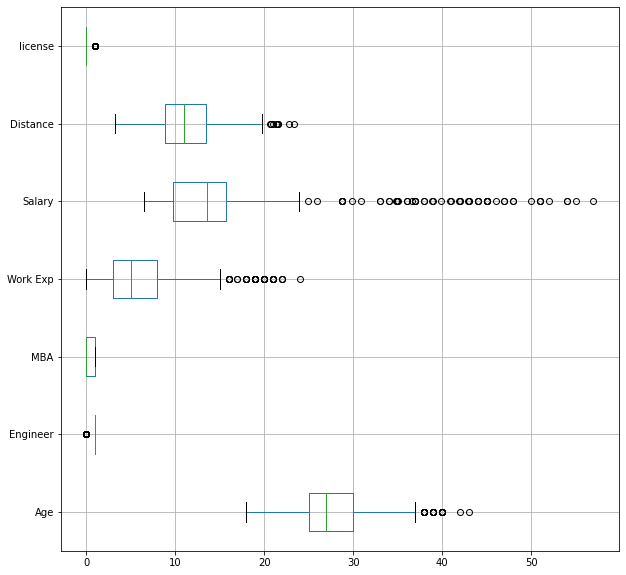

In [7]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_filtered=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

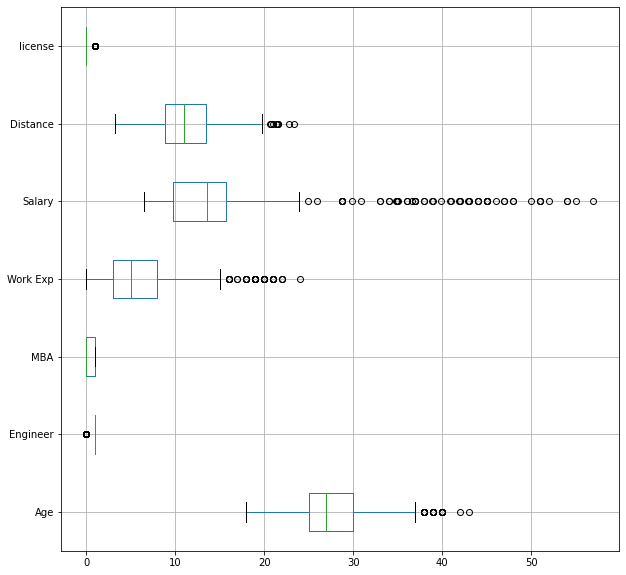

In [9]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

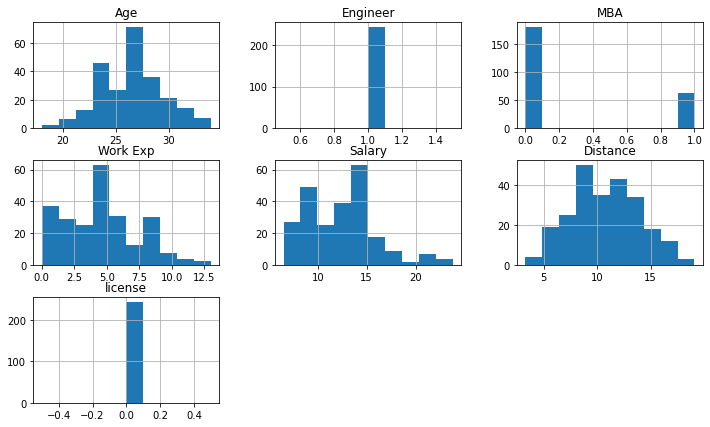

In [10]:
cols=df.dtypes[df.dtypes!='object'].index #taking only numerical attributes
fig = plt.figure(figsize = (12,7)) #figure size
ax = fig.gca() #this function adds as many as subplots as required depending upon number of columns
df_filtered[cols].hist(ax=ax) #histogram for numerical columns where axis ax is passed 
plt.show()

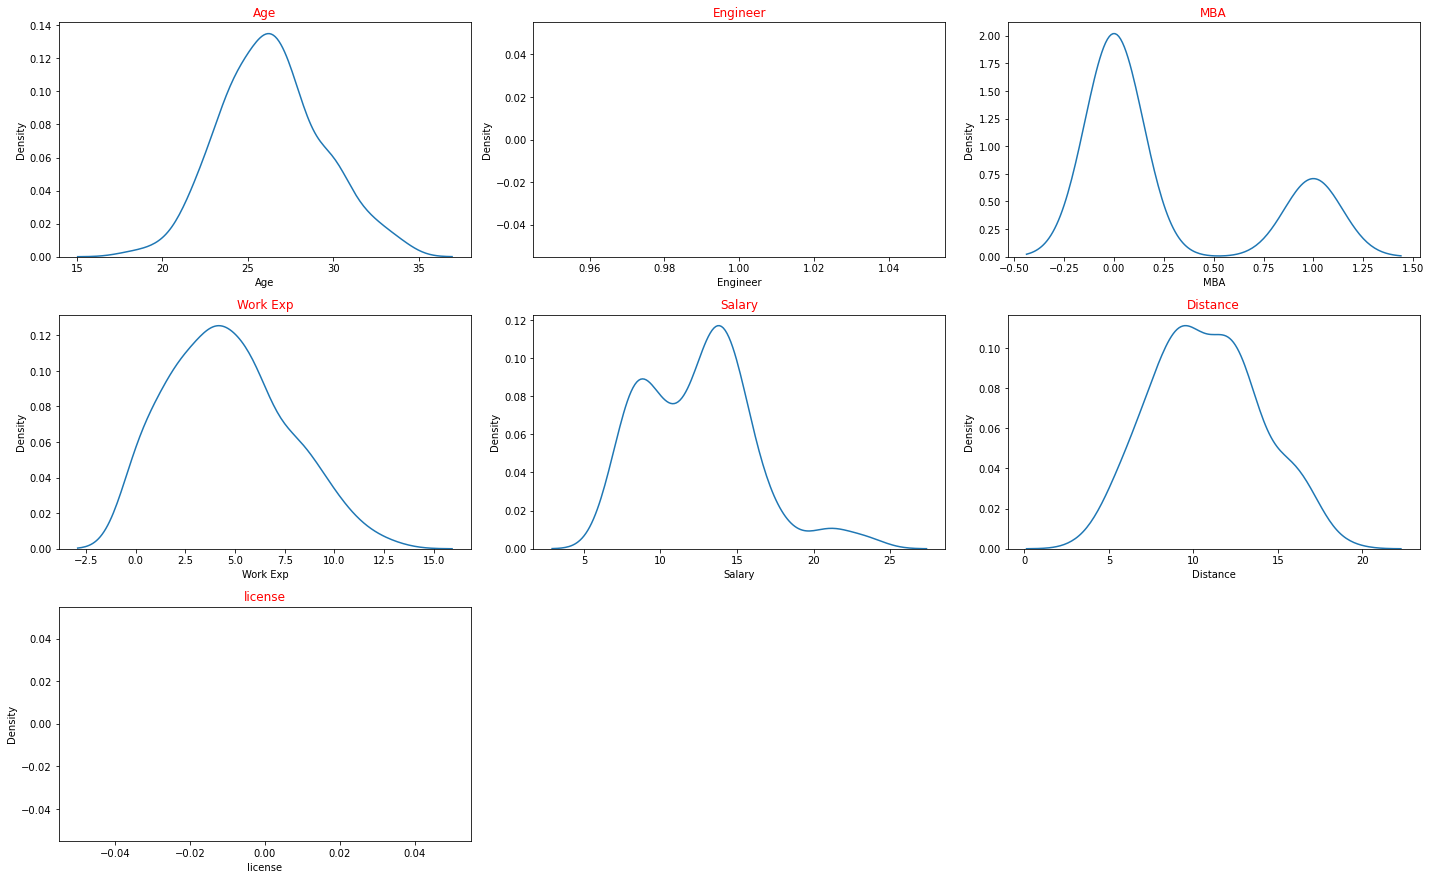

In [11]:
cols=df_filtered.dtypes[df_filtered.dtypes!='object'].index
data_plot=df_filtered[cols]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,3,i+1)
    sns.distplot(data_plot[data_plot.columns[i]], hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

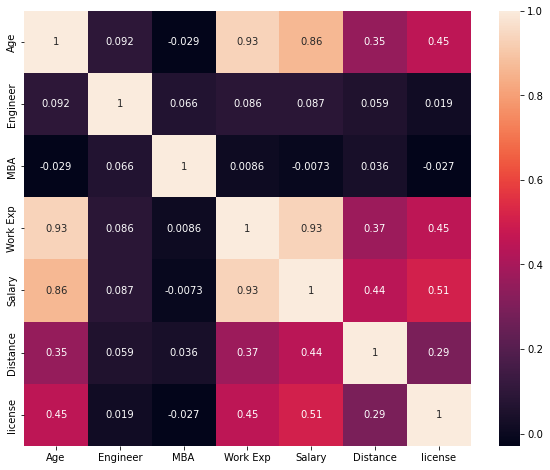

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [14]:
df = df.astype({"Gender":'category'})

In [15]:
import category_encoders as ce

In [16]:
df['Gender'] = df['Gender'].cat.codes

In [17]:
x = df.drop(columns=['Transport'])
y = df['Transport']

In [18]:
print(x)

     Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license
0     28       1         0    0         4    14.3       3.2        0
1     23       0         1    0         4     8.3       3.3        0
2     29       1         1    0         7    13.4       4.1        0
3     28       0         1    1         5    13.4       4.5        0
4     27       1         1    0         4    13.4       4.6        0
..   ...     ...       ...  ...       ...     ...       ...      ...
439   40       1         1    0        20    57.0      21.4        1
440   38       1         1    0        19    44.0      21.5        1
441   37       1         1    0        19    45.0      21.5        1
442   37       1         0    0        19    47.0      22.8        1
443   39       1         1    1        21    50.0      23.4        1

[444 rows x 8 columns]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    int8   
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), int8(1), object(1)
memory usage: 28.3+ KB


In [20]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,Public Transport
1,23,0,1,0,4,8.3,3.3,0,Public Transport
2,29,1,1,0,7,13.4,4.1,0,Public Transport
3,28,0,1,1,5,13.4,4.5,0,Public Transport
4,27,1,1,0,4,13.4,4.6,0,Public Transport


In [21]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x = trans.fit_transform(x)

In [23]:
print (x_train)

     Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license
201   29       1         0    0         5    15.9      10.5        0
386   27       1         1    1         6    12.9      15.6        0
329   27       1         1    0         6    12.9      13.3        0
249   23       1         1    0         0     6.9      11.7        0
349   30       1         1    0         7    14.9      14.0        0
..   ...     ...       ...  ...       ...     ...       ...      ...
255   29       0         0    0         7    13.6      11.7        0
72    29       0         0    0         7    14.6       7.7        0
396   25       1         0    0         3     9.9      15.9        0
235   24       1         1    1         0     7.7      11.3        1
37    25       0         0    0         3     9.6       6.7        0

[310 rows x 8 columns]


In [24]:
print (y_train)

201     Public Transport
386     Public Transport
329     Public Transport
249    Private Transport
349     Public Transport
             ...        
255     Public Transport
72      Public Transport
396     Public Transport
235     Public Transport
37     Private Transport
Name: Transport, Length: 310, dtype: object


In [25]:
print (x_test)

     Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license
247   26       0         1    0         8    14.6      11.6        0
179   27       1         0    1         5    13.9      10.0        0
186   35       0         1    0        16    28.7      10.2        0
31    24       1         1    1         2     8.6       6.4        0
218   33       1         1    0        11    16.7      10.9        1
..   ...     ...       ...  ...       ...     ...       ...      ...
39    22       1         1    0         3     8.4       6.8        0
192   36       1         1    1        18    28.7      10.4        1
300   25       1         0    0         5    13.7      12.7        1
277   25       0         1    0         5    18.9      12.2        0
98    31       1         1    0        10    14.8       8.4        0

[134 rows x 8 columns]


In [26]:
print (y_test)

247     Public Transport
179     Public Transport
186     Public Transport
31      Public Transport
218    Private Transport
             ...        
39      Public Transport
192     Public Transport
300    Private Transport
277    Private Transport
98      Public Transport
Name: Transport, Length: 134, dtype: object


# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [28]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7910447761194029
[[22 20]
 [ 8 84]]


0.7910447761194029


<AxesSubplot:>

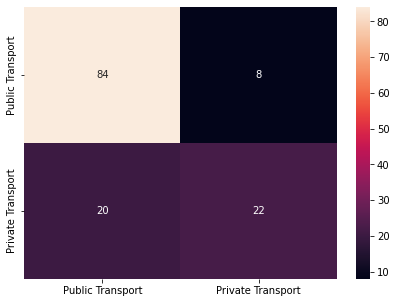

In [29]:
y_predict = model.predict(x_test)
print(model.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7910447761194029
[[24 18]
 [10 82]]


0.7910447761194029


<AxesSubplot:>

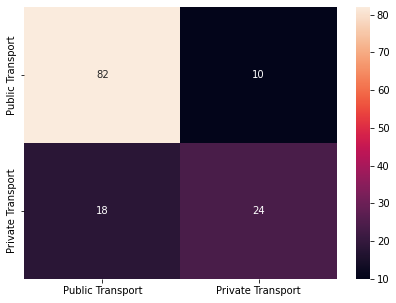

In [32]:
y_predict = model.predict(x_test)
print(model.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Decision Tree

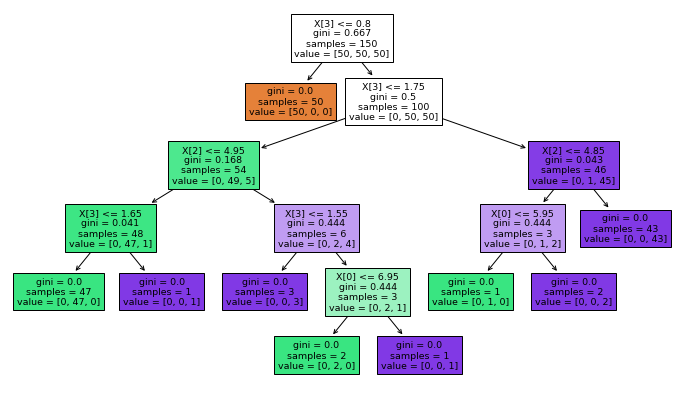

In [33]:
#Visualising Dtree in Python
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris=load_iris()
plt.figure(figsize=(12,7))
tree.plot_tree(clf.fit(iris.data, iris.target),filled=True) 
plt.show()

In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [35]:
y_predict = clf.predict(x_test)
model_score = clf.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7761194029850746
[[30 12]
 [18 74]]


0.7761194029850746


<AxesSubplot:>

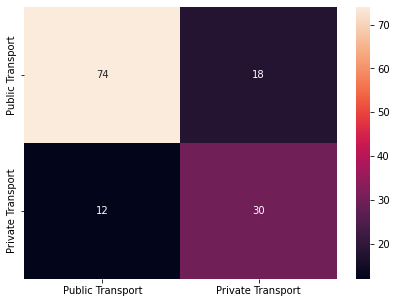

In [36]:
y_predict = clf.predict(x_test)
print(clf.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Random Forest

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(x_train,y_train)

y_pred=clfRF.predict(x_test)
model_scoreRF = clfRF.score(x_test, y_test)

In [38]:
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))

0.8059701492537313
[[27 15]
 [11 81]]


0.8059701492537313


<AxesSubplot:>

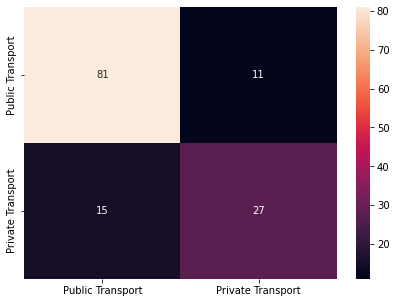

In [39]:
y_predict = clfRF.predict(x_test)
print(clfRF.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

`

# Linear Discriminant Analysis

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)
y_pred=clfLDA.predict(x_test)
model_scoreLDA = clfLDA.score(x_test, y_test)
print(model_scoreLDA)
print(metrics.confusion_matrix(y_test, y_pred))

0.8208955223880597
[[26 16]
 [ 8 84]]


0.8208955223880597


<AxesSubplot:>

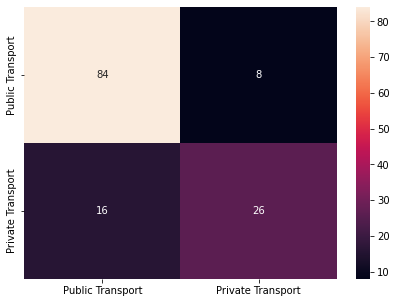

In [41]:
y_predict = clfLDA.predict(x_test)
print(clfLDA.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble: Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [43]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7910447761194029
[[24 18]
 [10 82]]


0.7910447761194029


<AxesSubplot:>

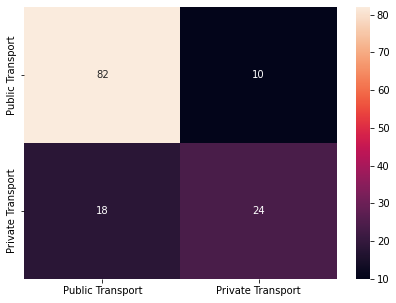

In [44]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train) #scaling the data since KNN is a distance based algorithm.
x_test_scaled=ss.transform(x_test)
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train_scaled,y_train)
y_pred=clfKNN.predict(x_test_scaled)
model_scoreKNN = clfKNN.score(x_test_scaled, y_test)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_test, y_pred))

0.7835820895522388
[[23 19]
 [10 82]]


0.7686567164179104


<AxesSubplot:>

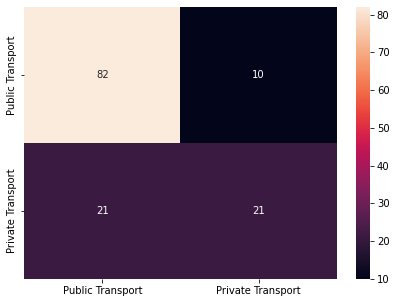

In [72]:
y_predict = clfKNN.predict(x_test)
print(clfKNN.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# CART

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [50]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [51]:
from sklearn import tree

In [52]:
y_predict = dt_model.predict(x_test)

In [53]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(x_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [54]:
ytrain_predict = reg_dt_model.predict(x_train)
ytest_predict = reg_dt_model.predict(x_test)

In [55]:
print(reg_dt_model)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)


In [70]:
model_scorereg = reg_dt_model.score(x_test, y_test)

In [71]:
print(model_scorereg)
print(metrics.confusion_matrix(y_test, y_predict))

0.7910447761194029
[[26 16]
 [12 80]]


0.7910447761194029


<AxesSubplot:>

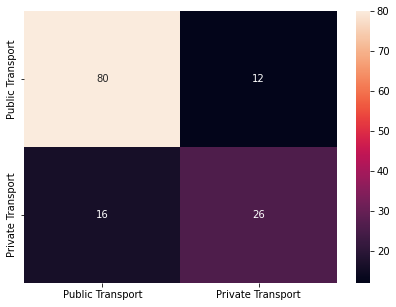

In [57]:
y_predict = reg_dt_model.predict(x_test)
print(reg_dt_model.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['Public Transport', 'Private Transport'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Public Transport","Private Transport"]],
                  columns = [i for i in ["Public Transport","Private Transport"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')